In [1]:
# Robotics Model For Stick Balancing
# Imports :

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Import Data :

In [2]:
df = pd.read_csv('../dataset.csv')
# Show Brief :
x = df[["X2[t]","S[t]"]].values
y = df[["X2[t+1]","S[t+1]"]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print('X shape is =', x_train.shape, ', Y shape is =', y_train.shape)

X shape is = (44, 2) , Y shape is = (44, 2)


## Create Model :

In [3]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=2))
model.add(Dense(2, activation='linear'))
model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mse','mae'])

Instructions for updating:
Colocations handled automatically by placer.


## Fit :

In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=4,  verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 35 samples, validate on 9 samples
Epoch 1/10
35/35 [==============================] - 2s 45ms/step - loss: 105850.5230 - mean_squared_error: 105850.5230 - mean_absolute_error: 255.3727 - val_loss: 101329.1519 - val_mean_squared_error: 101329.1519 - val_mean_absolute_error: 247.3454
Epoch 2/10
35/35 [==============================] - 0s 913us/step - loss: 98009.8083 - mean_squared_error: 98009.8083 - mean_absolute_error: 241.9761 - val_loss: 95024.5946 - val_mean_squared_error: 95024.5946 - val_mean_absolute_error: 236.3195
Epoch 3/10
35/35 [==============================] - 0s 1ms/step - loss: 92078.0158 - mean_squared_error: 92078.0158 - mean_absolute_error: 231.4056 - val_loss: 89484.5165 - val_mean_squared_error: 89484.5165 - val_mean_absolute_error: 226.2100
Epoch 4/10
35/35 [==============================] - 0s 700us/step - loss: 86696.3721 - mean_squared_error: 86696.3721 - mean_absolute_error: 221.3422 - val_loss: 84302.13

In [5]:
model.save('model.h5')

## Test :

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


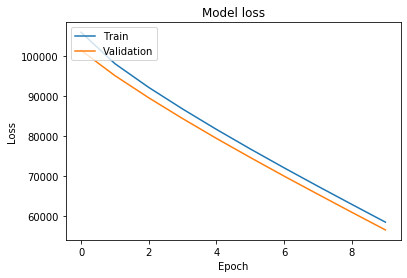

In [6]:
print(history.history.keys())
# Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Predict :

In [6]:
x_predict = np.array([x_test[0]])
y_predict = model.predict(x_predict)
print("X=%s, Predicted=%s" % (x_predict[0], y_predict[0]))

X=[4.68000000e+02 3.63636364e-01], Predicted=[138.3276   -51.654873]


## Save & Visualize :

In [7]:
new_predicted = model.predict(x_test)
df = pd.DataFrame(new_predicted, columns=["X2[t]","S[t]"])
df.to_csv('../visualize/dataset.csv', index=False)